In [ ]:
import scipy
from scipy.stats import pearsonr
from scipy.io import loadmat
from scipy.io.wavfile import write
from scipy.special import expit, logit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import IPython
from IPython.display import Audio
import math 
from numpy.fft import fft, ifft
from numpy.linalg import inv
from IPython.display import Audio

import time as time
import random


In [ ]:
sounds = loadmat('sounds.mat')['sounds']

test = loadmat('icaTest.mat')
A_test = test['A']
U_test = test['U']

U_test_mean_vector = U_test.mean(axis = 0)
U_test= U_test - U_test_mean_vector

print(np.shape(test['A']))
print(np.shape(test['U']))

In [ ]:
#convert sounds to an numpy array 
sounds  = np.asarray(sounds)
print(np.shape(sounds))

In [ ]:
#sound 1 : Homer Simpson
#sound 1 : drill
#sound 2 : clapping
#sound 3 : laughing
#sound 4: paper crinkling

Audio(sounds[0,:], rate=11025)
#Audio(sounds[1,:], rate=11025)
#Audio(sounds[2,:], rate=11025)
#Audio(sounds[3,:], rate=11025)
#Audio(sounds[4,:], rate=11025)



In [ ]:
### plot of U_test small sample of original sounds



fig, axs = plt.subplots(3, 1)
axs[0].plot(U_test[0, :])
axs[1].plot(U_test[1, :])
axs[2].plot(U_test[2, :])

fig.suptitle('Test matrix, unmixed ', fontsize=16)


xlabel = "Time in ms"
ylabel = "Amplitude"
matplotlib.pyplot.ylabel(ylabel)
matplotlib.pyplot.xlabel(xlabel)

plt.show()

In [4]:
def grad_update(previous_weights):

    #previous weights generated from the previous step take the place of w_init.
# Y = WX, W is previous weights matrix and X is the product of random weights A and original sources U

    Y = np.dot(previous_weights, X)
    
    
    
   
    
    Z = np.empty((n_source_signals, mytime))
    
    
    ## populate z using sigmoid

    for i in range(n_source_signals):
        for j in range(mytime):
        #Sigmoid
          
            Z[i,j] = 1/ (1+np.exp(-Y[i,j]))
        
      
            
  
    
    
    
          
    
    # matrix operations
    
    one_minus_2z_matrix = np.zeros((n_source_signals, mytime))
    
   

    
    for m in range(n_source_signals):
      for n in range(mytime):
            one_minus_2z_matrix[i,j] = 1.-2.*Z[i,j]
            
           

    
  
          
          
  
    intermed_result_one = np.dot(one_minus_2z_matrix, Y.T)
    
    

    
    intermed_result_two = np.dot((identity_matrix + intermed_result_one),previous_weights) 
    
    
   
    
    grad_w =eta *intermed_result_two
    
    
    
    #gradient clipping
    grad_w = grad_w/np.linalg.norm(grad_w, ord = 2)
    
    
    #print("gradw eta")
    #print(grad_w)
    
    
    return grad_w

In [5]:

## whitening function

def whiten(X):
    if X is None:
        raise TypeError('Cannot whiten None')
    
    # Zero mean normalization
    X -= np.mean(X, axis=1, keepdims=True)
    
    cov = np.cov(X)
    
    # Get eigenvectors, eigenvalues
    Lambda, Phi = np.linalg.eigh(cov)
    
    # Get diagonal eigen vectors
    Lambda = np.diag(Lambda)
    
    # Obtain \Lambda^{-1/2}
    Lambda = np.sqrt(np.linalg.inv(Lambda))
    
    # y = \Lambda \Phi^{T} X
    return np.dot(Lambda, np.dot(Phi.T, X))

In [12]:
#paramters, eta = learning rate 

##using parameters for debugging set "test"


n_source_signals = 5
mytime = 1000
mixed_signals = 5
iterations = 1000000

identity_matrix = np.identity(n_source_signals)


#randomly seed A matrix, the mixing weights 

np.random.seed(3)
a_weights = np.random.uniform( low = -10, high = 10, size =(n_source_signals, mixed_signals))

U = sounds[0:n_source_signals, 0:mytime ]


#Initialize W, the weights estimate of A^(-1), with small random numbers 

np.random.seed(1)

w_init = np.random.uniform( low = 0, high = .01, size =(n_source_signals, mixed_signals))



# X=AU

X = np.dot(a_weights, U)

# call whitening function

X = whiten(X)






print(a_weights)

eta = 0.01




grad_cur = w_init+ grad_update(w_init) 






[[ 1.01595805  4.16295645 -4.18190522  0.2165521   7.85893909]
 [ 7.92586178 -7.48829379 -5.85514244 -8.97065593 -1.18380313]
 [-9.40247578 -0.86333551  2.98288095 -4.43025435  3.52509804]
 [ 1.81725635 -9.52036235  1.17708176 -4.81495106 -1.69797606]
 [-4.32949836  3.86275837 -1.19092565 -6.86264523  0.89298036]]


In [13]:
%%time

#repeat updates 
for i in range(iterations ):
   
    
    if (i<=iterations): 
        grad_previous = grad_cur
        grad_cur = grad_previous + grad_update(grad_previous)
        
        
        
    
        m,n = np.shape(grad_cur)
        print( "iteration: " + str(i))
        
        i+= 1
          

final_weights = grad_cur

print("final weights")
print(final_weights)


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

KeyboardInterrupt: 

In [ ]:
### Original sounds 
fig, axs = plt.subplots(5, 1)
axs[0].plot(sounds[0, 0:mytime])
axs[1].plot(sounds[1, 0:mytime])
axs[2].plot(sounds[2, 0:mytime])
axs[3].plot(sounds[3, 0:mytime])
axs[4].plot(sounds[4, 0:mytime])
fig.suptitle('Original signals ' + str(mytime) + "ms", fontsize=16)


xlabel = "Time in ms"
ylabel = "Amplitude"
matplotlib.pyplot.ylabel(ylabel)
matplotlib.pyplot.xlabel(xlabel)

plt.show()


In [ ]:
### Mixed sounds 
fig, axs = plt.subplots(5, 1)
axs[0].plot(X[0, 0:mytime])
axs[1].plot(X[1, 0:mytime])
axs[2].plot(X[2, 0:mytime])
axs[3].plot(X[3, 0:mytime])
axs[4].plot(X[4, 0:mytime])
fig.suptitle('Mixed signals post-whitening ' + str(mytime) + "ms", fontsize=16)


xlabel = "Time in ms"
ylabel = "Amplitude"
matplotlib.pyplot.ylabel(ylabel)
matplotlib.pyplot.xlabel(xlabel)

plt.show()


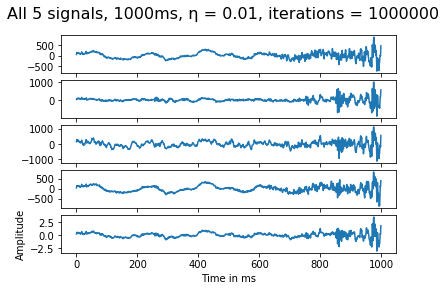

<Figure size 432x288 with 0 Axes>

In [14]:
#All 5 signals using Gradients 



view_matrix =np.matmul(final_weights,X)

fig, axs = plt.subplots(5, 1)
axs[0].plot(view_matrix[0, :])
axs[1].plot(view_matrix[1, :])
axs[2].plot(view_matrix[2, :])
axs[3].plot(view_matrix[3, :])
axs[4].plot(view_matrix[4, :])

fig.suptitle('All 5 signals, ' + str(mytime)+ 'ms, η = ' + str(eta) + ', iterations = '+  str(iterations) , fontsize=16)


xlabel = "Time in ms"
ylabel = "Amplitude"
matplotlib.pyplot.ylabel(ylabel)
matplotlib.pyplot.xlabel(xlabel)

plt.show()

plt.savefig('foo'+ str(iterations) + '.png')

In [15]:
#Test pearson correlation to measure match of unmixed sounds to original source

sounds_clip = sounds[:,0:mytime]

coefficient, pvalue = scipy.stats.pearsonr(sounds_clip[1,:],view_matrix[1,:])


pearson_coefficients = np.empty((5,5))

for i in range(m):
    for j in range(m):
        coefficient, p_value = scipy.stats.pearsonr(sounds_clip[i,:],view_matrix[j,:])
        pearson_coefficients[i,j] = coefficient
        
print('All 5 signals, ' + str(mytime)+ 'ms, η = ' + str(eta) + ', iterations = '+  str(iterations) + "  Pearson Correlations,  i = original, j = mixed")
print(pearson_coefficients)





#ex: pearson_coefficents[1,2] = 0.512 is the correlation between (sounds[1,:],view_matrix[2,:])


All 5 signals, 1000ms, η = 0.01, iterations = 1000000  Pearson Correlations,  i = original, j = mixed
[[-0.24877768 -0.80807957 -0.31386005 -0.23358416 -0.5005354 ]
 [ 0.46864982  0.50509131  0.51988101  0.49054143  0.53770017]
 [-0.13741422 -0.08684235 -0.56639455 -0.06822211 -0.23544984]
 [-0.42443173  0.02003444 -0.26756292  0.29827933 -0.15652823]
 [-0.71780016 -0.12983925 -0.4939242  -0.75085074 -0.59446098]]


In [ ]:
#Ear test for unmixed sounds

#sound 1 : Homer Simpson
#sound 1 : drill
#sound 2 : clapping
#sound 3 : laughing
#sound 4: paper crinkling

#Audio(view_matrix[0,:], rate=11025)
Audio(view_matrix[1,:], rate=11025)
#Audio(sounds[2,:], rate=11025)
#Audio(sounds[3,:], rate=11025)
#Audio(sounds[4,:], rate=11025)